In [1]:
!wget 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'

--2020-11-19 10:21:16--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 2600:1f1e:c3c:f301:5e55:6854:41de:670e, 2600:1f1e:c3c:f300:52c7:5c11:9783:e057, 54.207.147.214, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|2600:1f1e:c3c:f301:5e55:6854:41de:670e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3089521 (2,9M) [text/csv]
Saving to: ‘full_data.csv’

full_data.csv       100%[===================>]   2,95M   738KB/s    in 4,1s    

2020-11-19 10:21:21 (738 KB/s) - ‘full_data.csv’ saved [3089521/3089521]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
covid_19 = pd.read_csv('full_data.csv')
covid_19 = covid_19.fillna(0) # Transformo los missing values en 0s 

In [4]:
covid_19

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57211,2020-11-15,Zimbabwe,21.0,0.0,8786.0,257.0,288.0,6.0,424.0,15.0
57212,2020-11-16,Zimbabwe,0.0,0.0,8786.0,257.0,255.0,4.0,412.0,14.0
57213,2020-11-17,Zimbabwe,111.0,0.0,8897.0,257.0,336.0,3.0,508.0,12.0
57214,2020-11-18,Zimbabwe,48.0,3.0,8945.0,260.0,335.0,5.0,535.0,14.0


In [5]:
print(covid_19['location'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala

In [6]:
def filtrar_pais(country):
    # Filtramos el pais
    pais = covid_19[covid_19['location'] == country]
    
    return pais


def casosYmuertes_pais(country):
    # Filtramos el pais
    pais = filtrar_pais(country)
    pais_date = pais['date']
    pais_cases = pais['total_cases']
    pais_deaths = pais['total_deaths']

    return pais_date, pais_cases, pais_deaths
    
def plot_casosYmuertes(country):    

    pais_date, pais_cases, pais_deaths = casosYmuertes_pais(country)
    #Charts
    plt.figure(figsize=(20, 8), facecolor='white')

    #Cases
    plt.subplot(1, 2, 1)
    
    plt.plot(pais_date, pais_cases)
    plt.xticks(pais_date[::15], rotation=60)

    plt.title(country + ' cases')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.grid()


    #Deaths
    plt.subplot(1, 2, 2)
    
    plt.plot(pais_date, pais_deaths, color='r')
    plt.xticks(pais_date[::15], rotation=60)

    plt.title(country + ' deaths')
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    
    plt.grid()
    plt.show()

In [7]:
def comparar_2paises(country1, country2):
    pais1_date, pais1_cases, pais1_deaths = casosYmuertes_pais(country1)
    pais2_date, pais2_cases, pais2_deaths = casosYmuertes_pais(country2)
    
    # Separo los datos en 2 dataFrames y luego mergeo con respecto a la fecha
    series_c1 = {'date': pais1_date, 'cases_c1': pais1_cases, 'deaths_c1': pais1_deaths}
    datos_c1 = pd.DataFrame(data=series_c1)
    series_c2 = {'date': pais2_date, 'cases_c2': pais2_cases, 'deaths_c2': pais2_deaths}
    datos_c2 = pd.DataFrame(data=series_c2)

    data = pd.merge(datos_c1, datos_c2, on='date')  # Data limpia

    # Actualizo los datos
    date = data['date']
    pais1_cases, pais1_deaths = data['cases_c1'], data['deaths_c1']
    pais2_cases, pais2_deaths = data['cases_c2'], data['deaths_c2']
    

    # Analizo los cruces
    cruce_date_cases = []
    cruce_cases = []
    cruce_date_deaths = []
    cruce_deaths = []

    # Cases
    for i in range(len(date)-1):
        if (((pais1_cases[i] >= pais2_cases[i]) and (pais1_cases[i+1] < pais2_cases[i+1]))) or (((pais2_cases[i] >= pais1_cases[i]) and (pais2_cases[i+1] < pais1_cases[i+1]))):
              cruce_date_cases.append(date[i])
              cruce_cases.append(pais1_cases[i])
    # Deaths
    for i in range(len(date)-1):
        if (((pais1_deaths[i] >= pais2_deaths[i]) and (pais1_deaths[i+1] < pais2_deaths[i+1]))) or (((pais2_deaths[i] >= pais1_deaths[i]) and (pais2_deaths[i+1] < pais1_deaths[i+1]))):
              cruce_date_deaths.append(date[i])
              cruce_deaths.append(pais1_deaths[i])
    
      
    # Grafico

    plt.figure(figsize=(20, 8), facecolor='white')
    #Cases
    plt.subplot(1, 2, 1)
    
    # Grafico paises
    plt.plot(date, pais1_cases, label=country1)
    plt.plot(date, pais2_cases, label=country2)
    
    # Grafico Intersecciones
    plt.scatter(cruce_date_cases, cruce_cases, s=70, c='red')


    plt.xticks(date[::15], rotation=60)


    plt.title(country1 + ' vs. ' + country2 + ' cases')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.grid()
    plt.legend()



    #Deaths
    plt.subplot(1, 2, 2)
    
    # Grafico paises
    plt.plot(date, pais1_deaths, label=country1)
    plt.plot(date, pais2_deaths, label=country2)

    # Grafico Intersecciones
    plt.scatter(cruce_date_deaths, cruce_deaths, s=70, c='red')
    
    plt.xticks(date[::15], rotation=60)

    plt.title(country1 + ' vs. ' + country2 + ' deaths')
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()

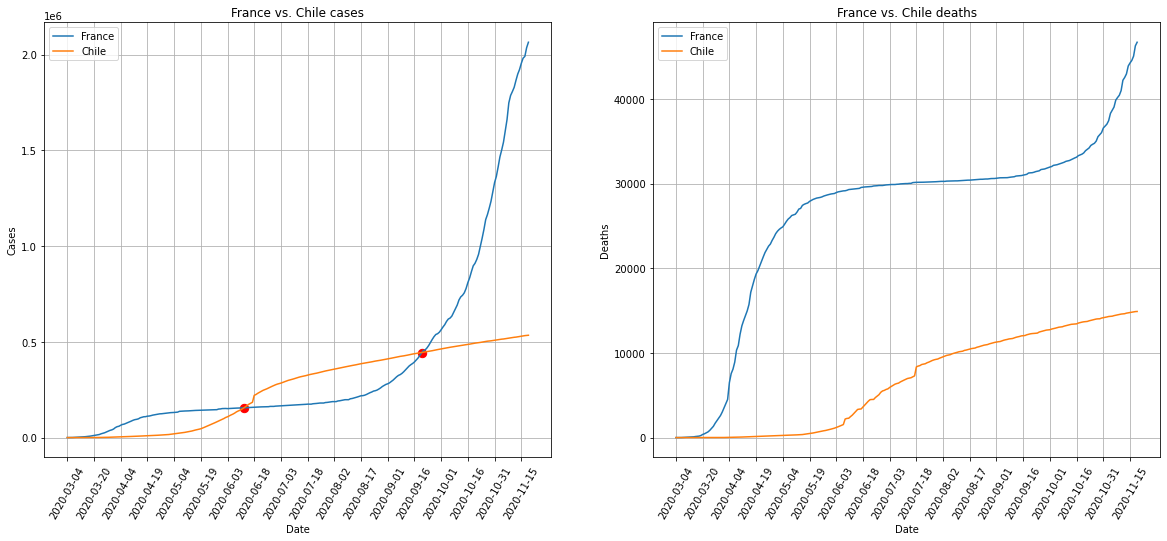

In [10]:
comparar_2paises('France', 'Chile')

In [55]:
def mergear_cases(lista_paises):                                      #Devuelve DataFrame con todos los casos 
    data_paises = []
    for i in range(len(lista_paises)):
        data_paises.append(
        pd.DataFrame({                         # genero DataFrame de cada pais
            'date' : casosYmuertes_pais(lista_paises[i])[0],                     # [0] = fechas del pais
            'cases_' + lista_paises[i] : casosYmuertes_pais(lista_paises[i])[1], # [1] = casos del pais
             }))
        
    for j in range(1, len(data_paises)):    # mergeo en base la fecha
        data_paises[j] = pd.merge(data_paises[j-1], data_paises[j], on='date')
    
    return data_paises[-1]


def mergear_deaths(lista_paises):                                       #Devuelve DataFrame con todas las muertes 
    data_paises = []
    for i in range(len(lista_paises)):
        data_paises.append(
        pd.DataFrame({                      # genero DataFrame de cada pais
            'date' : casosYmuertes_pais(lista_paises[i])[0],                     # [0] = fechas del pais
            'deaths_' + lista_paises[i] : casosYmuertes_pais(lista_paises[i])[2], # [2] = muertes del pais
             }))
        
    for j in range(1, len(data_paises)):    # mergeo en base la fecha
        data_paises[j] = pd.merge(data_paises[j-1], data_paises[j], on='date')
    
    display(len(data_paises[-1].columns[0]))
mergear_deaths(['Argentina', 'France', 'Brazil', 'Spain'])

4

In [61]:
def plotearN_paises(df_paises):
    date = df_paises['date']
    cols = df_paises.columns
    
    #Charts
    plt.figure(figsize=(15,8))
    for i in range(1, len(cols)):
        plt.plot(date, df_paises[cols[i]], label=cols[i])
    
    plt.xticks(date[::15], rotation=60)

    plt.legend()
    plt.grid()
    plt.show()

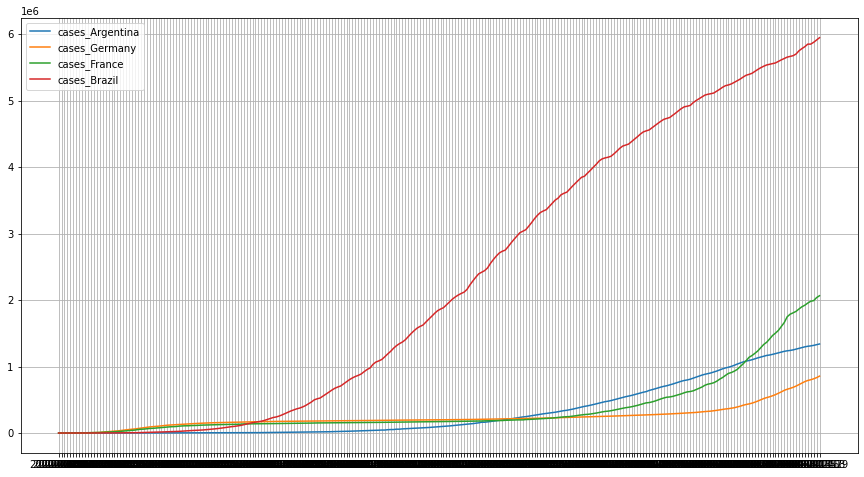

In [62]:
plotearN_paises(mergear_cases(['Argentina', 'Germany', 'France', 'Brazil']))